In [218]:
import torch
from torch import nn
import circuits as ckt
from circuits import Kinds
import learn as lrn
from models import Solver
from models import State
from data import Input

In [219]:
# Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

# torch.autograd.set_detect_anomaly(True)
torch.set_printoptions(precision=3, linewidth=200)

Using cpu device


# Generate Input Data for a Simple Circuit
Circuit is an independent voltage source and a resistor.

Circuit with 3 nodes and 3 elements
[0, 1, 2]
[(IVS, 2, 0), (R, 1, 0), (R, 2, 1)]
[(2, {}), (0, {}), (1, {})]
[(2, 0, 0, {'kind': <Kinds.IVS: 0>, 'i': None, 'v': None, 'attr': 10}), (2, 1, 0, {'kind': <Kinds.R: 2>, 'i': None, 'v': 4, 'attr': None}), (1, 0, 0, {'kind': <Kinds.R: 2>, 'i': None, 'v': None, 'attr': None})]


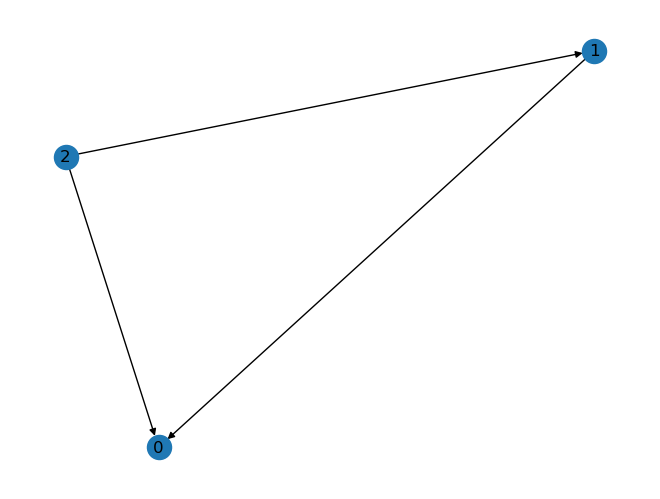

In [220]:
vr = ckt.ring(Kinds.IVS,Kinds.R,2)
vr.elements[0].attr = 10
vr.elements[-1].v = 4

print(vr)
print(vr.nodes)
print(vr.elements)
vr.draw()
print(vr.nx_graph().nodes().data())
print(vr.nx_graph().edges(data=True,keys=True))

# Create Solver

In [221]:
input = Input(vr)

In [222]:
import time

model = Solver(input=input,attr=input.attr_param, state=State.Solve)
start_time = time.time()
X = model()
end_time = time.time()
X

tensor([[-32.544],
        [ 32.544],
        [ 32.544],
        [ 10.000],
        [  1.307],
        [  8.693],
        [ -1.307],
        [  8.693]], grad_fn=<LinalgSolveExBackward0>)

In [223]:
print(f'execution time = {(end_time - start_time)*1000} ms')

execution time = 0.9860992431640625 ms


# Learn attributes

In [224]:
num_epochs = 1000
prev_loss = 0.1

model = Solver(input=input, attr=input.attr_param, state=State.Solve)
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)
loss, _ = lrn.train(model,optimizer,nn.MSELoss())
print(f'init params: {input.attr_param}')
print(f'init loss: {loss.item()}')

epoch = 0

while(epoch < num_epochs):
    loss, _ = lrn.train(model,optimizer,nn.MSELoss())
    if(loss < 1e-11):
            break
    epoch += 1
    loss_change = abs(loss - prev_loss) / prev_loss
    prev_loss = loss

print(f'Done! at {epoch} passes')
print(f'solution = {model()}')
print(f"attributes = {input.attr_param}")

init params: Parameter containing:
tensor([[10.000],
        [ 0.050],
        [ 0.257]], requires_grad=True)
init loss: 11.01150131225586
Done! at 195 passes
solution = tensor([[-28.235],
        [ 28.235],
        [ 28.235],
        [ 10.000],
        [  6.000],
        [  4.000],
        [ -6.000],
        [  4.000]], grad_fn=<LinalgSolveExBackward0>)
attributes = Parameter containing:
tensor([[10.000],
        [ 0.213],
        [ 0.142]], requires_grad=True)
